In [1]:
import ROOT as rt
import root_numpy as rtnp
import numpy as np
from matplotlib import pyplot as plt
from histo_utilities import create_TH1D, create_TH2D, std_color_list
from array import array
import CMS_lumi, tdrstyle
tdrstyle.setTDRStyle()
CMS_lumi.writeExtraText = 1
CMS_lumi.extraText = "     Simulation Preliminary"

donotdelete = []

Welcome to JupyROOT 6.13/02


In [2]:
fpath = {}
tree = {}
process = {}
process_short = {}

fpath['m500ctau1000'] = '/home/cms/Desktop/LLP/jetNtuple_4jet/jetNtuple_M-500_CTau-1000mm.root'
process['glueBall'] = 'pp #rightarrow h*h* #rightarrow jj#nu#nu'
process_short['glueBall'] = 'pp #rightarrow h*h* #rightarrow jj#nu#nu'


for k,v in fpath.iteritems():
    print k, v
    tree[k] = rtnp.root2array(v)
    #tree[k] = rtnp.tree2array(v)
    #jet_max_pt_array = [np.max(x) for x in tree[k]["jetPt"]]
    a = tree[k]["jetPt"]
    print a[:-1][0]

m500ctau1000 /home/cms/Desktop/LLP/jetNtuple_4jet/jetNtuple_M-500_CTau-1000mm.root
[245.10352  224.2073   192.44597   50.55233   16.677832  14.581306
  11.624692  10.09615 ]


In [3]:
T = tree['m500ctau1000']

In [4]:
#get first jet pt per event
#T['jetPt'][0]
first_jet_pt = [x[0] if len(x) else -1 for x in T['jetPt']]
print(len(first_jet_pt))

10000


# Reco Time

Warning in <TROOT::Append>: Replacing existing TH1: max_jet_reco_time (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: max_jet_reco_time (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: max_jet_reco_time (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: max_jet_reco_time (Potential memory leak).
Info in <TCanvas::Print>: pdf file max_jet_reco_time.pdf has been created


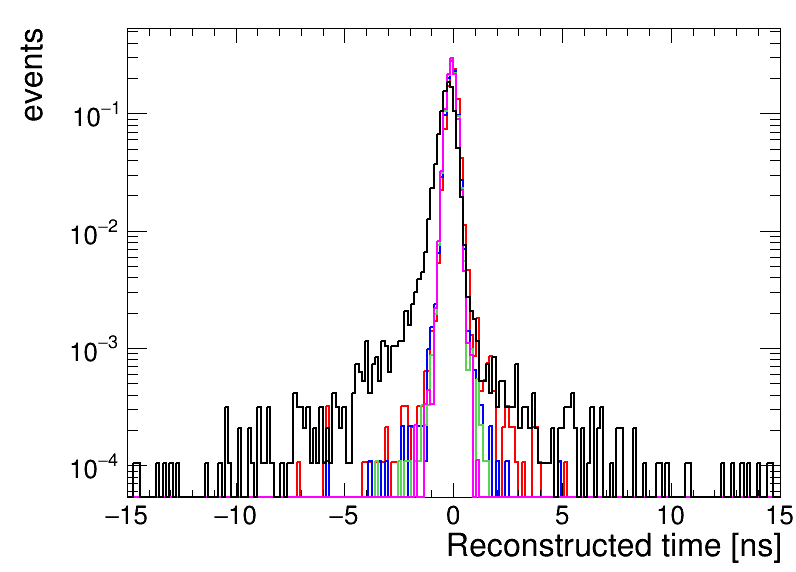

In [4]:
max_jet_reco_time = np.array([x[0] if len(x) else -1 for x in T['jet_rechit_T']])
max_jet_reco_time1 = np.array([x[0] if len(x) else -1 for x in T['jet_rechit_T_Ecut1']])
max_jet_reco_time2 = np.array([x[0] if len(x) else -1 for x in T['jet_rechit_T_Ecut2']])
max_jet_reco_time3 = np.array([x[0] if len(x) else -1 for x in T['jet_rechit_T_Ecut3']])
max_jet_reco_time4 = np.array([x[0] if len(x) else -1 for x in T['jet_rechit_T_Ecut4']])

# for i in range(len(T['jet_rechit_T'])):
#     for j in range(len(T['jet_rechit_T'][i])):
#         if not np.isnan(T['jet_rechit_T'][i][j]):
#             max_jet_reco_time.append(T['jet_rechit_T'][i][j])




c = rt.TCanvas('c','c', 800, 600)
h = {}
# h['max_jet_pv_reco_time'] = create_TH1D( max_jet_pv_reco_time, axis_title=['Reconstructed time [ns]', 'events'], name='max_jet_pv_reco_time', binning=[200,-5,15])
h['max_jet_reco_time'] = create_TH1D( max_jet_reco_time, axis_title=['Reconstructed time [ns]', 'events'], name='max_jet_reco_time', binning=[200,-15,15])
h['max_jet_reco_time1'] = create_TH1D( max_jet_reco_time1, axis_title=['Reconstructed time [ns]', 'events'], name='max_jet_reco_time', binning=[200,-15,15])
h['max_jet_reco_time2'] = create_TH1D( max_jet_reco_time2, axis_title=['Reconstructed time [ns]', 'events'], name='max_jet_reco_time', binning=[200,-15,15])
h['max_jet_reco_time3'] = create_TH1D( max_jet_reco_time3, axis_title=['Reconstructed time [ns]', 'events'], name='max_jet_reco_time', binning=[200,-15,15])
h['max_jet_reco_time4'] = create_TH1D( max_jet_reco_time4, axis_title=['Reconstructed time [ns]', 'events'], name='max_jet_reco_time', binning=[200,-15,15])

# c.SetLogy()
h['max_jet_reco_time'].SetLineColor(1)
h['max_jet_reco_time1'].SetLineColor(2)
h['max_jet_reco_time2'].SetLineColor(4)
h['max_jet_reco_time3'].SetLineColor(8)
h['max_jet_reco_time4'].SetLineColor(6)

# h['max_jet_reco_time'].GetYaxis().SetRangeUser(0.00001,10000)
h['max_jet_reco_time1'].DrawNormalized('')
h['max_jet_reco_time2'].DrawNormalized('same')
h['max_jet_reco_time3'].DrawNormalized('same')
h['max_jet_reco_time4'].DrawNormalized('same')
h['max_jet_reco_time'].DrawNormalized('same')

# h['max_jet_reco_time4'].GetYaxis().SetRangeUser(0,1)

# print(h['max_jet_pv_reco_time'].Integral())

# h['max_jet_pv_reco_time'].Draw('same')
c.SetLogy()
c.Draw()
c.SaveAs("../plots/max_jet_reco_time.pdf")

# Gen Time

10000
9977.0


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TROOT::Append>: Replacing existing TH1: max_pt_gen_time (Potential memory leak).
Info in <TCanvas::Print>: pdf file max_pt_gen_time.pdf has been created


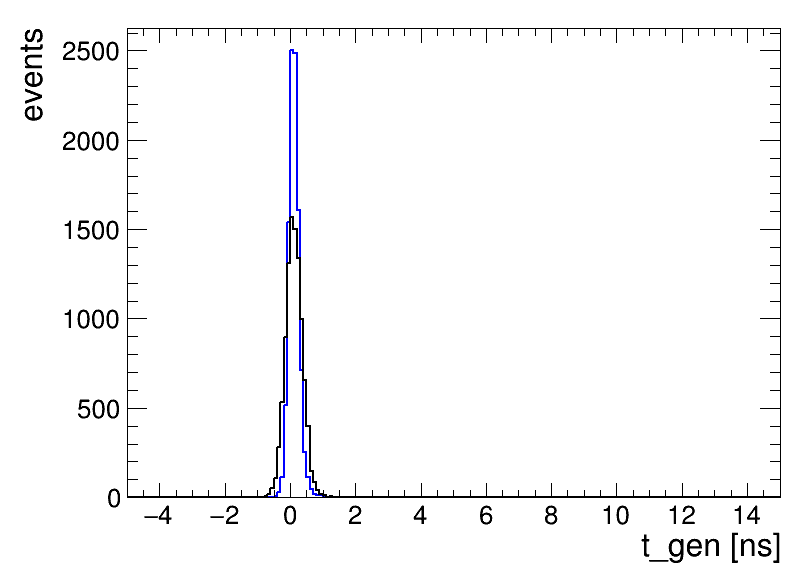

In [23]:
gLLP_travel_time = T['gLLP_travel_time']
genVertexT = T['genVertexT']
gLLP_daughter_travel_time = T['gLLP_daughter_travel_time']
gen_time = np.column_stack((gLLP_travel_time[:,0],gLLP_travel_time[:,0],gLLP_travel_time[:,1],gLLP_travel_time[:,1]))+gLLP_daughter_travel_time
gen_time_nobs = np.reshape(genVertexT,(-1,1)) + gen_time #without beamspot correction
max_pt_gen_time = np.array([np.max(x) if len(x) else -1 for x in gen_time])
max_pt_gen_time_nobs = np.array([np.max(x) if len(x) else -1 for x in gen_time_nobs])

c = rt.TCanvas('c','c', 800, 600)
h = {}
h['max_pt_gen_time_nobs'] = create_TH1D( max_pt_gen_time_nobs, axis_title=['t_gen [ns]', 'events'], name='max_pt_gen_time', binning=[200,-5,15])

h['max_pt_gen_time'] = create_TH1D( max_pt_gen_time, axis_title=['t_gen [ns]', 'events'], name='max_pt_gen_time', binning=[200,-5,15])
h['max_pt_gen_time'].SetLineColor(4)
# c.SetLogy()
print(len(max_pt_gen_time))
print(h['max_pt_gen_time'].Integral())
h['max_pt_gen_time'].Draw()
h['max_pt_gen_time_nobs'].Draw('same')

c.Draw()
c.SaveAs("max_pt_gen_time.pdf")

In [6]:
gLLP_decay_radius = np.sqrt(np.square(T['gLLP_decay_vertex_x'])+np.square(T['gLLP_decay_vertex_y'])) # (events, 2) 2LLP
gLLP_daughter_match_jet_index = T['gLLP_daughter_match_jet_index']
gLLP_daughter_travel_time = T['gLLP_daughter_travel_time']
genVertexT = T['genVertexT']
matched_jets = np.logical_and(np.logical_not( gLLP_daughter_travel_time == -666), np.logical_not( gLLP_daughter_match_jet_index == 666))
gen_time = np.column_stack((gLLP_travel_time[:,0],gLLP_travel_time[:,0],gLLP_travel_time[:,1],gLLP_travel_time[:,1]))+gLLP_daughter_travel_time
jet_pt =T['jetPt']
gLLP_daughter_match_jet_index = gLLP_daughter_match_jet_index[matched_jets]
rechit_T_1 =  T['jet_rechit_T_Ecut1']
rechit_T_2 =  T['jet_rechit_T_Ecut2']
rechit_T_3 =  T['jet_rechit_T_Ecut3']
rechit_T_4 =  T['jet_rechit_T_Ecut4']
rechit_E_1 =  T['jet_rechit_E_Ecut1']
rechit_E =  T['jet_rechit_E']
rechit_T =  T['jet_rechit_T']

jet_pt =  T['jetPt']

time_response = []
time_ecal = []
time_rechitcut = []


time_tgen = []
time_pt = []
for i in range(len(T['gLLP_daughter_match_jet_index'])): #loop through each event
    max_pt = 0
    max_pt_index = 666
    for j in range(4): #loop through each gen jet
        index = T['gLLP_daughter_match_jet_index'][i][j]
        if not index == 666 and matched_jets[i][j]: #matched and barrel jets
            if jet_pt[i][index]>max_pt:
                t_reco = rechit_T_1[i][index]
                max_pt = jet_pt[i][index]
                max_pt_index = j
            if j <= 1:
                llpid = 0
            else:
                llpid = 1
    if not max_pt_index == 666:
        jet_index = T['gLLP_daughter_match_jet_index'][i][max_pt_index]
        time_response.append(t_reco-gen_time[i][max_pt_index])
        time_tgen.append([t_reco-gen_time[i][max_pt_index], gen_time[i][max_pt_index]])
        time_ecal.append([t_reco-gen_time[i][max_pt_index],rechit_E_1[i][jet_index]])
        time_rechitcut.append([rechit_T[i][jet_index]-gen_time[i][max_pt_index],rechit_T_1[i][jet_index]-gen_time[i][max_pt_index],rechit_T_2[i][jet_index]-gen_time[i][max_pt_index],rechit_T_3[i][jet_index]-gen_time[i][max_pt_index],rechit_T_4[i][jet_index]-gen_time[i][max_pt_index]])


        time_pt.append([t_reco-gen_time[i][max_pt_index],jet_pt[i][jet_index]])

time_ecal = np.array(time_ecal)
time_tgen = np.array(time_tgen)
time_pt = np.array(time_pt)
time_rechitcut = np.array(time_rechitcut)
print(time_ecal.shape)

(9938, 2)


# Time in rechit cut

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TROOT::Append>: Replacing existing TH1: max_jet_ecal (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: max_jet_ecal (Potential memory leak).
Info in <TCanvas::Print>: pdf file ../plots/reco_vs_gen_time.pdf has been created


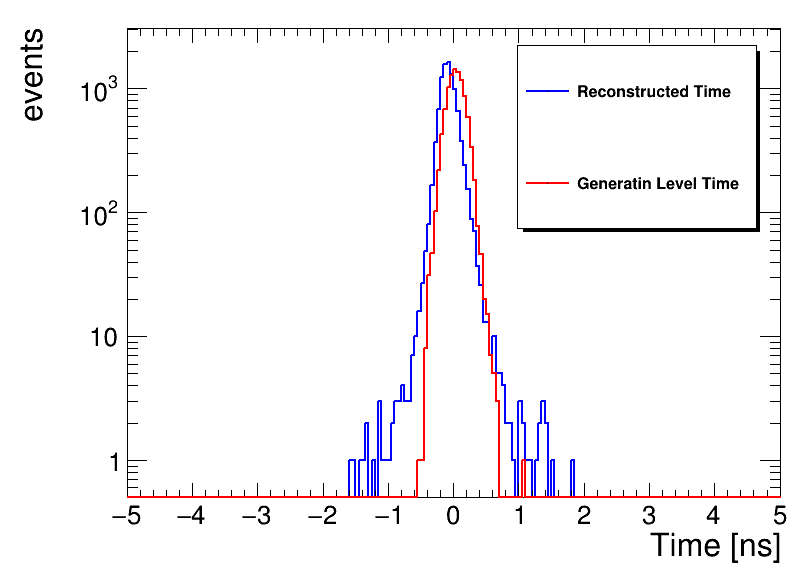

In [71]:
c = rt.TCanvas('c','c', 800, 600)
h['time_rechitcut'] = create_TH1D(time_rechitcut[:,1], axis_title=['Time [ns]', 'events'], name='max_jet_ecal', binning=[200,-5,5])
h['time_rechitcut'].SetLineColor(4)
h['time_gen'] = create_TH1D(time_tgen[:,1], axis_title=['Time [ns]', 'events'], name='max_jet_ecal', binning=[200,-5,5])
h['time_gen'].SetLineColor(2)

c.SetLogy()
h['time_rechitcut'].Draw()
h['time_gen'].Draw('same')
leg = rt.TLegend(0.65,0.60,0.95,0.92)
# leg.SetTextFont(42)
leg.SetTextSize(0.03)
leg.SetEntrySeparation(0.01)
leg.AddEntry(h['time_rechitcut'],"Reconstructed Time")
leg.AddEntry(h['time_gen'],"Generatin Level Time")
leg.Draw()
c.Draw()
c.SaveAs("../plots/reco_vs_gen_time.pdf")

9814.0
9861.0
9902.0
9924.0
9933.0


Warning in <TROOT::Append>: Replacing existing TH1: h0 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h1 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h2 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h3 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h4 (Potential memory leak).
Error in <THistPainter::PaintInit>: Cannot set Y axis to log scale
Error in <THistPainter::PaintInit>: Cannot set Y axis to log scale
Info in <TCanvas::Print>: pdf file ../plots/time_response_rechit.pdf has been created


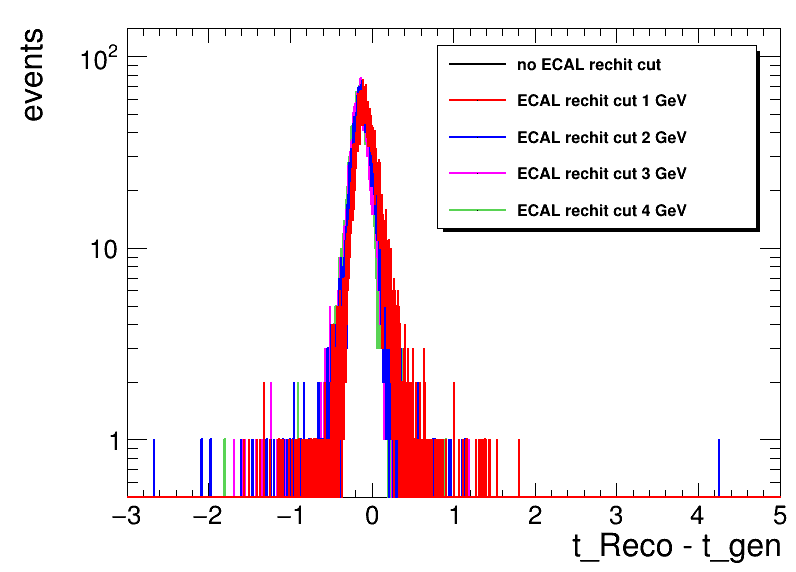

In [26]:
c = rt.TCanvas('c1','c1', 800, 600)
leg = rt.TLegend(0.55,0.60,0.95,0.92)
# leg.SetTextFont(42)
leg.SetTextSize(0.03)
leg.SetEntrySeparation(0.01)
# # Create 2d numpy array matched-jets vs. LLP decay radius
h = {}
proj = []


bins = [1,2,3,4,5,6]

    
for i in range(len(bins)-1):
    key = 'bin'+str(i)
    h['time_rechitcut'] = create_TH1D(time_rechitcut[:,i], axis_title=['t_Reco - t_gen', 'events'], name="h"+str(i), binning=[12000,-10,10])

    proj.append(h['time_rechitcut'])
    if i == 0:
        leg.AddEntry(proj[i],'no ECAL rechit cut')

    else:
        leg.AddEntry(proj[i],'ECAL rechit cut '+str(i)+' GeV')

proj[0].GetYaxis().SetTitle("Events")
proj[0].GetYaxis().SetRangeUser(0,1)
line_color = [1,2,3,6,8]
for j in range(len(bins)-1):
    i = len(bins)-2-j
    proj[i].SetLineColor(line_color[i])
    print(proj[i].Integral())
#     proj[i].Rebin(30)
#     proj[i].Scale(1./proj[i].Integral())
#     proj[i].GetYaxis().SetRangeUser(0,0.1)
    proj[i].GetXaxis().SetRangeUser(-3,5)

    if j == 0:
        proj[i].DrawCopy()
    if j == 2:
        proj[i].SetLineColor(4)

    proj[i].DrawCopy('SAME')
# proj[2].GetYaxis().SetRangeUser(0,1)

leg.Draw()
c.SetLogy()
c.Draw()

# c.SaveAs('time_response_ecal.pdf')
assert(len(bins)-1 == len(proj))
c.SaveAs("../plots/time_response_rechit.pdf")

1
0.56
1
0.248333333333
1
0.23
1
0.223333333333
1
0.225


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TROOT::Append>: Replacing existing TH1: trd (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: scale (Potential memory leak).
Info in <TCanvas::Print>: pdf file ../plots/time_scale_ecal_rechit.pdf has been created


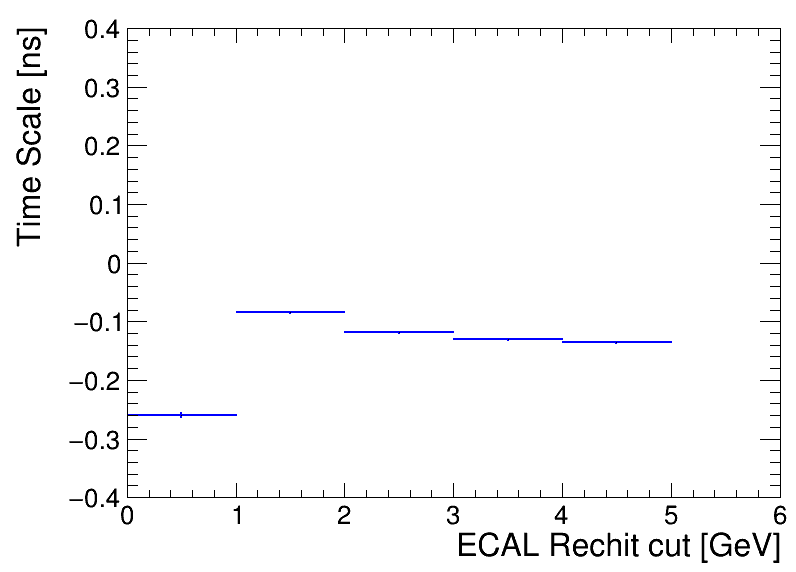

In [28]:
### response w.r.t time gen

sigma_eff = True
c = rt.TCanvas('c', 'c', 800, 600)
# legend = rt.TLegend(0.15,0.70,0.4,0.9);
# legend.AddEntry(time_res_plots[0],'M 500 GeV, CTau 1000 mm')
# legend.AddEntry(time_Ecut1_median_plots[1],'QCD HT 300-500GeV')


rt.gStyle.SetOptStat(000)
# print(h['time_ecal'].GetXaxis().GetNbins())
assert(len(bins)-1 == len(proj))

    
x_bins = [x-1 for x in bins]
res = rt.TH1F('trd','res', len(bins)-1,array( 'f', x_bins))
scale = rt.TH1F('scale','scale',len(bins)-1,array( 'f', x_bins))
for i in range(len(proj)):
    h1 = proj[i] 
    hnew = h1.Clone("hnew")
    hnew = hnew.Rebin(30)
    SS = rt.TSpectrum()
    n_pks = SS.Search(hnew, 0.1, "", 0.5)
    x_pos = SS.GetPositionX()
    y_pos = SS.GetPositionY()
    pks = []
    print(n_pks)
#     if i==7:
#         h1.Rebin()
#         h1.DrawCopy()
#         break
    n_pk = hnew.FindBin(x_pos[0])
    thr = 0.5 * hnew.GetBinContent(n_pk)
    n_low = n_pk
    while hnew.GetBinContent(n_low) > thr:
        n_low -= 1
    x_low = hnew.GetBinCenter(n_low)    
    n_up = n_pk
    while hnew.GetBinContent(n_up) > thr:
        n_up += 1
    x_up = hnew.GetBinCenter(n_up)
    r = hnew.Fit('gaus', 'LRSQ+', '', x_low, x_up)
    r = r.Get()
    scale.SetBinContent(i+1,r.Parameter(1))
    scale.SetBinError(i+1,r.ParError(1))
    if abs(r.Parameter(1)-hnew.GetMean())>1:
        print("scale fit warning", i,r.Parameter(1),hnew.GetMean())
    if n_pks == 0:
        hnew.SetLineColor(4)
        hnew.Rebin(2)
#         print(r.Parameter(1))
        hnew.GetXaxis().SetRangeUser(-5,5)
        hnew.DrawCopy()
        break
    
    if sigma_eff:
        n_pk = h1.FindBin(x_pos[0])
        thr = 0.68 * h1.Integral()
        counter = h1.GetBinContent(n_pk)*1.0
        n_low = n_pk
        n_up = n_pk
        flag = True
        while counter < thr:
            if flag:
                n_low -= 1
                counter += h1.GetBinContent(n_low)
            else:
                n_up += 1
                counter += h1.GetBinContent(n_up)
            flag = not flag
        sigma_eff = (n_up - n_low) *h1.GetBinWidth(1)
#         sigma_eff = h1.GetStdDev()
        res.SetBinContent(i+1,sigma_eff)
        res.SetBinError(i+1,h1.GetBinWidth(1))
        print(sigma_eff)


draw_scale = True
if draw_scale:
#     scale.GetXaxis().SetRangeUser(0,800)
    scale.GetXaxis().SetRangeUser(0,400)
    scale.GetYaxis().SetRangeUser(-0.4,0.4)

    scale.SetXTitle('ECAL Rechit cut [GeV]')
    scale.SetYTitle('Time Scale [ns]')

    scale.SetLineColor(4)
    scale.DrawCopy()
    c.Draw()
    c.SaveAs('../plots/time_scale_ecal_rechit.pdf')
else:

    res.SetXTitle('ECAL Rechit cut [GeV]')
    res.SetYTitle('Time Resolution [ns]')
#     res.GetXaxis().SetRangeUser(0,400)
    res.GetYaxis().SetRangeUser(0,1)
    res.SetLineColor(4)
#     res_eff.SetLineColor(4)
    res.DrawCopy()
#     res_eff.DrawCopy('same')
#     legend.Draw()
    c.Draw()
    c.SaveAs('../plots/time_res_ecal_rechit.pdf')



# Time in ECAL energy bins

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: pdf file ../plots/ecal_energy_ecut1.pdf has been created


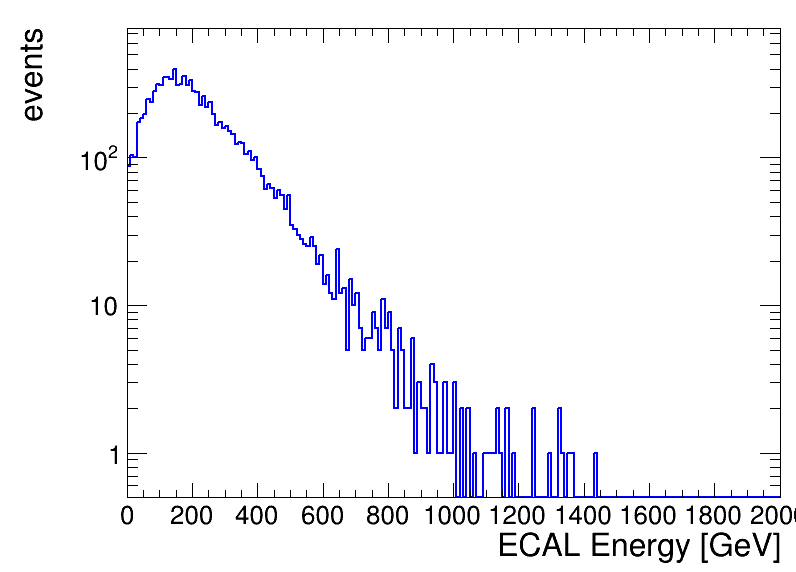

In [30]:
c = rt.TCanvas('c','c', 800, 600)
h = {}
h['ecal'] = create_TH1D(time_ecal[:,1], axis_title=['ECAL Energy [GeV]', 'events'], name='max_jet_ecal', binning=[200,0,2000])
h['ecal'].SetLineColor(4)
c.SetLogy()
h['ecal'].Draw()
c.Draw()
c.SaveAs("../plots/ecal_energy_ecut1.pdf")

899.0
7423.0
1601.0


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Warning in <TH1D::Rebin>: ngroup=70 is not an exact divider of nbins=12000.
Warning in <TH1D::Rebin>: ngroup=70 is not an exact divider of nbins=12000.
Warning in <TH1D::Rebin>: ngroup=70 is not an exact divider of nbins=12000.
Info in <TCanvas::Print>: pdf file ../plots/time_response_ecal_ecut1.pdf has been created


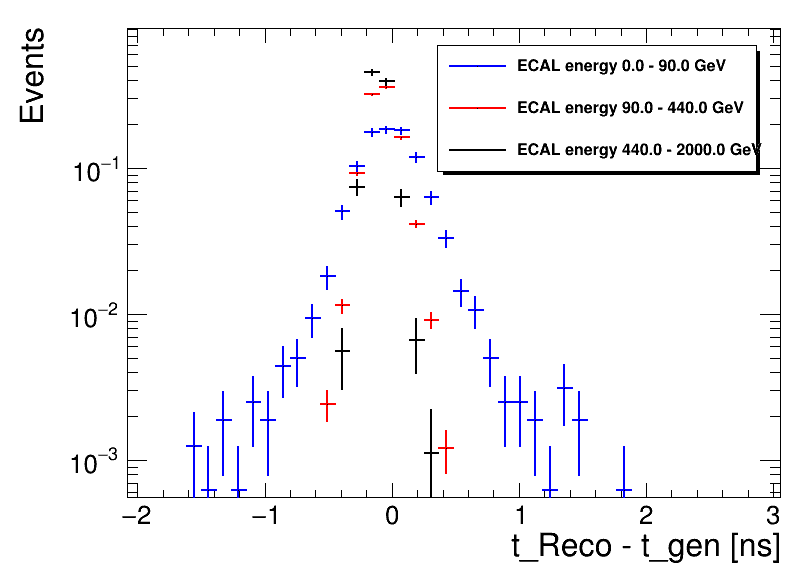

In [82]:
# Look at the number of rechits per jets in different LLP decay radius bin

draw = True
c = rt.TCanvas('c1','c1', 800, 600)
leg = rt.TLegend(0.55,0.70,0.95,0.92)
# leg.SetTextFont(42)
leg.SetTextSize(0.03)
leg.SetEntrySeparation(0.01)
# # Create 2d numpy array matched-jets vs. LLP decay radius
h = {}
proj = []
bin_low, bin_up = 30,50
h['time_ecal'] = create_TH2D(time_ecal, axis_title = ['t_Reco - t_gen [ns]','ECAL energy [GeV]',''], binning=[12000,-5,15,200,0,2000])
# bins = [1,10,45,201]

bins = []
i=0
min_event = 100
nbinsy =  h['time_ecal'].GetNbinsY()
while i < nbinsy:
    counter = 0
    while counter < min_event:
        h1 = h['time_ecal'].ProjectionX("h"+str(i),i+1,i+1)
        counter += h1.Integral()
        i+=1
        if i >nbinsy:
            break
    bins.append(i)
bins = bins[:len(bins)-2]+[bins[len(bins)-1]]

if draw:
    bins = [1,10,45,201]
    
for i in range(len(bins)-1):
    key = 'bin'+str(i)
    proj.append(h['time_ecal'].ProjectionX("h"+str(i),bins[i],bins[i+1]-1))
    y_low = h['time_ecal'].GetYaxis().GetBinLowEdge(bins[i])
    y_up = h['time_ecal'].GetYaxis().GetBinLowEdge(bins[i+1]-1)+h['time_ecal'].GetYaxis().GetBinWidth(1)
    leg.AddEntry(proj[i],'ECAL energy '+str(y_low)+' - '+str(y_up)+' GeV')

proj[2].GetYaxis().SetTitle("Events")
# proj[0].GetYaxis().SetRangeUser(0,1)
if draw:
    for i in range(len(bins)-1):
        index = len(bins)-2-i
        proj[index].SetLineColor(i+1)
        proj[index].Rebin(70)
        print(proj[index].Integral())
        proj[index].Scale(1./proj[index].Integral())
        proj[index].GetXaxis().SetRangeUser(-2,3)

        if i == 0:
            proj[len(bins)-2-i].DrawCopy()
        if i == 2:
            proj[index].SetLineColor(4)

        proj[len(bins)-2-i].DrawCopy('SAME')
    proj[2].GetYaxis().SetRangeUser(0,1)

    leg.Draw()
    c.SetLogy()
    c.Draw()
    c.SaveAs("../plots/time_response_ecal_ecut1.pdf")
assert(len(bins)-1 == len(proj))


Warning in <TROOT::Append>: Replacing existing TH1: trd (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: trd (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: scale (Potential memory leak).
Info in <TCanvas::Print>: pdf file ../plots/time_scale_ecal_energy_ecut1.pdf has been created


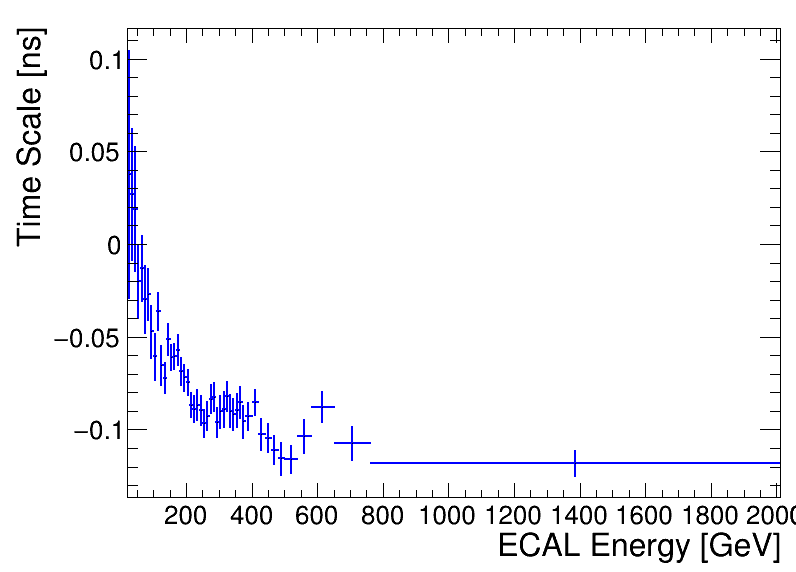

In [74]:

sigma_eff = True
c = rt.TCanvas('c', 'c', 800, 600)
legend = rt.TLegend(0.55,0.70,0.9,0.9);


rt.gStyle.SetOptStat(000)
# print(h['time_ecal'].GetXaxis().GetNbins())
assert(len(bins)-1 == len(proj))

    
x_bins = [x*10 for x in bins]
res = rt.TH1F('trd','res', len(bins)-1,array( 'f', x_bins))
res_eff = rt.TH1F('trd','res_eff', len(bins)-1,array( 'f', x_bins))

scale = rt.TH1F('scale','scale',len(bins)-1,array( 'f', x_bins))
for i in range(len(proj)):
    h1 = proj[i]
#     if i == 0:
#         h1.Rebin(3)
   
    hnew = h1.Clone("hnew")
    hnew = hnew.Rebin(60)
    SS = rt.TSpectrum()
    n_pks = SS.Search(hnew, 0.1, "", 0.5)
    x_pos = SS.GetPositionX()
    y_pos = SS.GetPositionY()
    pks = []
    
#     if i==7:
#         h1.Rebin()
#         h1.DrawCopy()
#         break
    n_pk = hnew.FindBin(x_pos[0])
    thr = 0.5 * hnew.GetBinContent(n_pk)
    n_low = n_pk
    while hnew.GetBinContent(n_low) > thr:
        n_low -= 1
    x_low = hnew.GetBinCenter(n_low)    
    n_up = n_pk
    while hnew.GetBinContent(n_up) > thr:
        n_up += 1
    x_up = hnew.GetBinCenter(n_up)
    r = hnew.Fit('gaus', 'LRSQ+', '', x_low, x_up)
    r = r.Get()
    scale.SetBinContent(i+1,r.Parameter(1))
    scale.SetBinError(i+1,r.ParError(1))
    if abs(r.Parameter(1)-hnew.GetMean())>1:
        print("scale fit warning", i,r.Parameter(1),hnew.GetMean())
    if n_pks == 0:
        hnew.SetLineColor(4)
        hnew.Rebin(2)
#         print(r.Parameter(1))
        hnew.GetXaxis().SetRangeUser(-5,5)
        hnew.DrawCopy()
        print(i)
        break
    
    if sigma_eff:
        n_pk = h1.FindBin(x_pos[0])
        thr = 0.68 * h1.Integral()
        counter = h1.GetBinContent(n_pk)*1.0
        n_low = n_pk
        n_up = n_pk
        flag = True
        while counter < thr:
            if flag:
                n_low -= 1
                counter += h1.GetBinContent(n_low)
            else:
                n_up += 1
                counter += h1.GetBinContent(n_up)
            flag = not flag
        sigma_eff = (n_up - n_low) *h1.GetBinWidth(1)
#         sigma_eff = h1.GetStdDev()
        res.SetBinContent(i+1,sigma_eff)
        res.SetBinError(i+1,h1.GetBinWidth(1))
    res_eff.SetBinContent(i+1,r.Parameter(2))
    res_eff.SetBinError(i+1,r.ParError(2))




legend.SetTextSize(0.03)
legend.AddEntry(res,'Sigma effective')
legend.AddEntry(res_eff,'Sigma from Gaussian FIt')




draw_scale = True
if draw_scale:
#     scale.GetXaxis().SetRangeUser(0,800)
#     scale.GetYaxis().SetRangeUser(-0.4,0.4)
    scale.SetXTitle('ECAL Energy [GeV]')
    scale.SetYTitle('Time Scale [ns]')
    scale.SetLineColor(4)
    scale.DrawCopy()
    c.Draw()
    c.SaveAs('../plots/time_scale_ecal_energy_ecut1.pdf')
else:
    res.SetXTitle('ECAL Energy [GeV]')
    res.SetYTitle('Time Resolution [ns]')
#     res.GetXaxis().SetRangeUser(0,800)
    res.GetYaxis().SetRangeUser(0,1)
    res.SetLineColor(2)
    res_eff.SetLineColor(4)
    res.DrawCopy()
    res_eff.DrawCopy('same')
    legend.Draw()
    c.Draw()
    c.SaveAs('../plots/time_res_ecal_energy_ecut1.pdf')



# Time response in t_gen

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: pdf file ../plots/tgen.pdf has been created


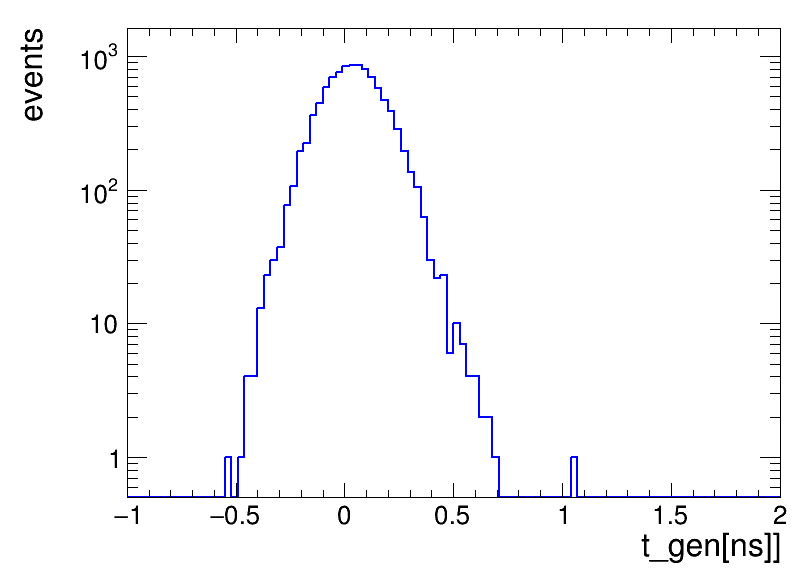

In [60]:
c = rt.TCanvas('c','c', 800, 600)
h = {}
h['t_gen'] = create_TH1D(time_tgen[:,1], axis_title=['t_gen[ns]]', 'events'], name='max_jet_ecal', binning=[100,-1,2])
h['t_gen'].SetLineColor(4)
c.SetLogy()
h['t_gen'].Draw()
c.Draw()
c.SaveAs("../plots/tgen.pdf")

1477.0
6063.0
2324.0


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Info in <TCanvas::Print>: pdf file ../plots/time_response_tgen.pdf has been created


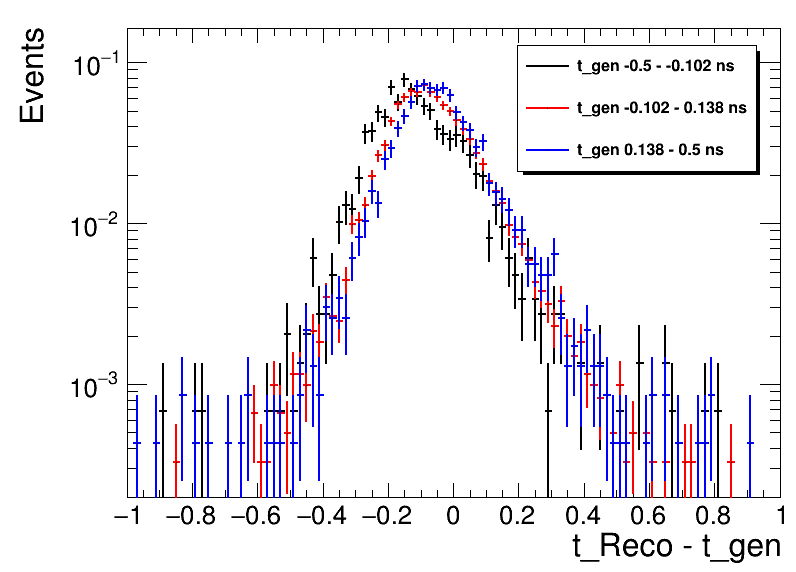

In [69]:
# Look at the number of rechits per jets in different LLP decay radius bin
draw = True

c = rt.TCanvas('c1','c1', 800, 600)
leg = rt.TLegend(0.65,0.70,0.95,0.92)
# leg.SetTextFont(42)
leg.SetTextSize(0.03)
leg.SetEntrySeparation(0.01)
# # Create 2d numpy array matched-jets vs. LLP decay radius
h = {}
proj = []
bin_low, bin_up = 30,50
h['time_tgen'] = create_TH2D(time_tgen, axis_title = ['t_Reco - t_gen','t_gen [ns]',''], binning=[6000,-1,1,500,-0.5,0.5])

bins = [1]
i=0
min_event = 100
nbinsy =  h['time_tgen'].GetNbinsY()
while i < nbinsy:
    counter = 0
    while counter < min_event:
        h1 = h['time_tgen'].ProjectionX("h"+str(i),i+1,i+1)
        counter += h1.Integral()
        i+=1
        if i >nbinsy:
            break
    bins.append(i)

bins = bins[:len(bins)-2]+[bins[len(bins)-1]]
# print(bins)
if draw:
    bins = [1,200,320,501]

for i in range(len(bins)-1):
    key = 'bin'+str(i)
    proj.append(h['time_tgen'].ProjectionX("h"+str(i),bins[i],bins[i+1]-1))
    y_low = h['time_tgen'].GetYaxis().GetBinLowEdge(bins[i])
    y_up = h['time_tgen'].GetYaxis().GetBinLowEdge(bins[i+1]-1)+h['time_tgen'].GetYaxis().GetBinWidth(1)
    leg.AddEntry(proj[i],'t_gen '+str(y_low)+' - '+str(y_up)+' ns')

proj[0].GetYaxis().SetTitle("Events")
# proj[0].GetYaxis().SetRangeUser(0,1)

for i in range(len(bins)-1):
    proj[i].SetLineColor(i+1)
    if draw:
        proj[i].Rebin(60)
        print(proj[i].Integral())
        proj[i].Scale(1./proj[i].Integral())
    #     proj[i].GetYaxis().SetRangeUser(0,0.5)

        if i == 0:
            proj[i].DrawCopy()
        if i == 2:
            proj[i].SetLineColor(4)

        proj[i].DrawCopy('SAME')
if draw:
    leg.Draw()
    c.SetLogy()
    c.Draw()
    c.SaveAs('../plots/time_response_tgen.pdf')
assert(len(bins)-1 == len(proj))

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TROOT::Append>: Replacing existing TH1: trd (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: trd (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: scale (Potential memory leak).
Info in <TCanvas::Print>: pdf file ../plots/time_scale_tgen.pdf has been created


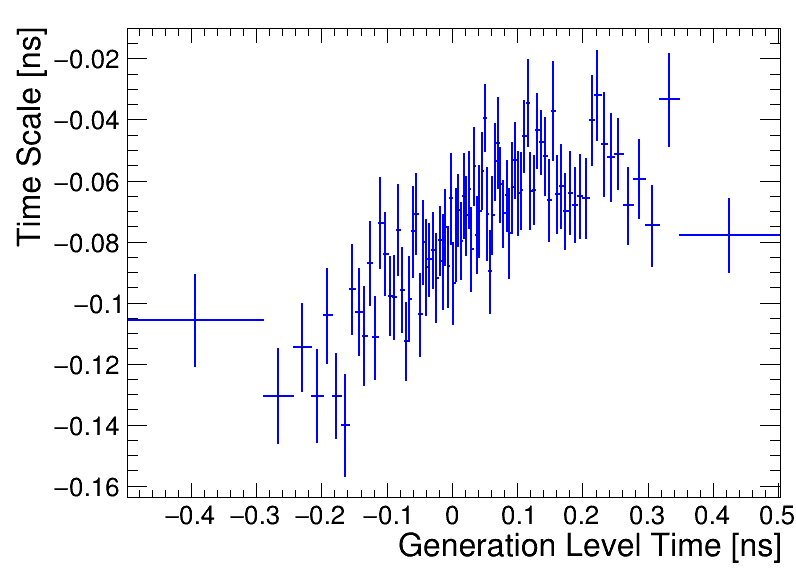

In [59]:
### response w.r.t time gen

sigma_eff = True
c = rt.TCanvas('c', 'c', 800, 600)
legend = rt.TLegend(0.2,0.70,0.55,0.9);


rt.gStyle.SetOptStat(000)
assert(len(bins)-1 == len(proj))

bw = h['time_tgen'].GetYaxis().GetBinWidth(1)
left_edge = h['time_tgen'].GetYaxis().GetBinLowEdge(1)

x_bins = [x*bw+left_edge for x in bins]
res = rt.TH1F('trd','res', len(bins)-1,array( 'f', x_bins))
res_eff = rt.TH1F('trd','res_eff', len(bins)-1,array( 'f', x_bins))

scale = rt.TH1F('scale','scale',len(bins)-1,array( 'f', x_bins))
for i in range(len(proj)):
    h1 = proj[i]
#     if i == 0:
#         h1.Rebin(3)
   
    hnew = h1.Clone("hnew")
    hnew = hnew.Rebin(60)
    SS = rt.TSpectrum()
    n_pks = SS.Search(hnew, 0.1, "", 0.5)
    x_pos = SS.GetPositionX()
    y_pos = SS.GetPositionY()
    pks = []
    
#     if i==50:
#         h1.DrawCopy()
#         print(x_bins[i])
#         break
    n_pk = hnew.FindBin(x_pos[0])
    thr = 0.5 * hnew.GetBinContent(n_pk)
    n_low = n_pk
    while hnew.GetBinContent(n_low) > thr:
        n_low -= 1
    x_low = hnew.GetBinCenter(n_low)    
    n_up = n_pk
    while hnew.GetBinContent(n_up) > thr:
        n_up += 1
    x_up = hnew.GetBinCenter(n_up)
    r = hnew.Fit('gaus', 'LRSQ+', '', x_low, x_up)
    r = r.Get()
    scale.SetBinContent(i+1,r.Parameter(1))
    scale.SetBinError(i+1,r.ParError(1))
    if abs(r.Parameter(1)-hnew.GetMean())>1:
        print("scale fit warning", i,r.Parameter(1),hnew.GetMean())
    if n_pks == 0:
        hnew.SetLineColor(4)
        hnew.Rebin(2)
#         print(r.Parameter(1))
        hnew.GetXaxis().SetRangeUser(-5,5)
        print(i)
        hnew.DrawCopy()
        break
    
    if sigma_eff:
        n_pk = h1.FindBin(x_pos[0])
        thr = 0.68 * h1.Integral()
        counter = h1.GetBinContent(n_pk)*1.0
        n_low = n_pk
        n_up = n_pk
        flag = True
        while counter < thr:
            if flag:
                n_low -= 1
                counter += h1.GetBinContent(n_low)
            else:
                n_up += 1
                counter += h1.GetBinContent(n_up)
            flag = not flag
        sigma_eff = (n_up - n_low) *h1.GetBinWidth(1)
#         sigma_eff = h1.GetStdDev()
        res.SetBinContent(i+1,sigma_eff)
        res.SetBinError(i+1,h1.GetBinWidth(1))
    res_eff.SetBinContent(i+1,r.Parameter(2))
    res_eff.SetBinError(i+1,r.ParError(2))




legend.SetTextSize(0.03)
legend.AddEntry(res,'Sigma effective')
legend.AddEntry(res_eff,'Sigma from Gaussian FIt')




draw_scale = True
if draw_scale:
#     scale.GetXaxis().SetRangeUser(0,800)
    scale.SetXTitle('Generation Level Time [ns]')
    scale.SetYTitle('Time Scale [ns]')
    scale.SetLineColor(4)
    scale.DrawCopy()
    c.Draw()
    c.SaveAs('../plots/time_scale_tgen.pdf')
else:
    res.SetXTitle('Generation Level Time [ns]')
    res.SetYTitle('Time Resolution [ns]')
    res.GetYaxis().SetRangeUser(0,0.5)
    res.SetLineColor(2)
#     res_eff.SetLineColor(4)
#     res.GetXaxis().SetRangeUser(0,2)
    res.DrawCopy()
    res_eff.DrawCopy('same')
    legend.Draw()
    c.Draw()
    c.SaveAs('../plots/time_res_tgen_zoom.pdf')

